SCARA PATH GENERATOR

In [ ]:

import numpy as np
import scipy
ini=np.array([1,1,1])
f=np.array([3,3,3])
tf=7
ax0=ini[0]
ay0=ini[1]
az0=ini[2]
ax1=0
ay1=0
az1=0

A=np.array([[tf**2,tf**3,0,0,0,0],[0,0,tf**2,tf**3,0,0],[0,0,0,0,tf**2,tf**3],[2*tf,3*tf**2,0,0,0,0],[0,0,2*tf,3*tf**2,0,0],[0,0,0,0,2*tf,3*tf**2]])
K=np.array([f[0],f[1],f[2],0,0,0])
invA=np.linalg.inv(A)
X=invA@K
print(X);
ax2=X[0]
ax3=X[1]
ay2=X[2]
ay3=X[3]
az2=X[4]
az3=X[5]
Aa=np.array([[ax0,ax1,ax2,ax3],[ay0,ay1,ay2,ay3],[az0,az1,az2,az3]])
arr = np.array([[0,0,0]])

#PATH calculator
def pathfunc(tf,Aa,arr):
  t=0
  for t in range (tf+1):
    T=np.array([1,t,t**2,t**3])
    print(t)
    
    row=Aa@T
    print(row)
    arr = np.vstack([arr,row])

  return arr

arr = np.array([[0,0,0]])
arr1 =pathfunc(tf,Aa,arr) #here we get all the points of trajectory
print(arr1)

#inverse kinematics

def invkine(arr1,J):
  for i in range(len(arr1)):
    x=[0]*3;
    x=arr1[i];
    offset=2;
    d1=3;
    d2=1;
    r = abs((x[0]**2+x[1]**2-d1**2-d2**2)/(2*d1*d2))
    theta2 = np.arctan(np.sqrt(abs(1-r**2))/r)
    theta1 = np.arctan(x[1]/x[0]) - np.arctan((d2*np.sin(theta2))/(d1+d2*np.cos(theta2)))
    d3 =offset-x[2]
    s=np.array([theta1,theta2,d3])
    J=np.vstack([J,s])
  return J

    
J=np.array([[0,0,0]])
arr2=invkine(arr1,J) #here we get all the JOINT VAR of trajectory
print(arr2)










[ 0.18367347 -0.01749271  0.18367347 -0.01749271  0.18367347 -0.01749271]
0
[1. 1. 1.]
1
[1.16618076 1.16618076 1.16618076]
2
[1.59475219 1.59475219 1.59475219]
3
[2.18075802 2.18075802 2.18075802]
4
[2.81924198 2.81924198 2.81924198]
5
[3.40524781 3.40524781 3.40524781]
6
[3.83381924 3.83381924 3.83381924]
7
[4. 4. 4.]
[[0.         0.         0.        ]
 [1.         1.         1.        ]
 [1.16618076 1.16618076 1.16618076]
 [1.59475219 1.59475219 1.59475219]
 [2.18075802 2.18075802 2.18075802]
 [2.81924198 2.81924198 2.81924198]
 [3.40524781 3.40524781 3.40524781]
 [3.83381924 3.83381924 3.83381924]
 [4.         4.         4.        ]]
[[ 0.          0.          0.        ]
 [        nan  0.67474094  2.        ]
 [ 0.6424904   0.5843739   1.        ]
 [ 0.65874639  0.51530277  0.83381924]
 [ 0.63623502  0.61126651  0.40524781]
 [ 0.47257178  1.48927457 -0.18075802]
 [ 0.73894073  0.18623433 -0.81924198]
 [ 0.60972479  0.72758217 -1.40524781]
 [ 0.60245313  0.76026321 -1.83381924]
 [

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:73: RuntimeWarning: invalid value encountered in double_scalars


JACOBIAN CALCULATOR

In [ ]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a=10.333333333333332 
b=7.666666666666666 
g=6 
d=1.3333333333333333
GR=9.8
m4=1
l1=2
l2=2
#I1=0.5mL2
#I2=0.5mL2


sym.init_printing()
q1, q2, d4,q1dot,q2dot,d4dot,q1ddot,q2ddot,d4ddot,T1,T2,F,mG = sym.symbols('q1 q2 d4 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG')
k1=sym.Matrix([q1,q2,d4])
k2=sym.Matrix([q1dot,q2dot,d4dot])
k3=sym.Matrix([q1ddot,q2ddot,d4ddot])
GQ=sym.Matrix([0,0,mG])
tau=sym.Matrix([T1,T2,F])
M=sym.Matrix([[-(l1/2)*sym.sin(q1),0,0],[(l1/2)*sym.cos(q1),0,0],[0,0,0]]);
X=M.T
N=sym.Matrix([[-l1*sym.sin(q1)-(l2/2)*sym.sin(q1+q2),-(l2/2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2/2)*sym.cos(q1+q2),(l2/2)*sym.cos(q1+q2),0],[0,0,0]]);
Y=N.T
O=sym.Matrix([[-l1*sym.sin(q1)-(l2)*sym.sin(q1+q2),-(l2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2)*sym.cos(q1+q2),(l2)*sym.cos(q1+q2),0],[0,0,-1]]);
Z=O.T
M1=sym.Matrix([[-(l1/2)*sym.sin(q1),0,0],[(l1/2)*sym.cos(q1),0,0],[0,0,0]]);
X1=M1.T
N1=sym.Matrix([[-l1*sym.sin(q1)-(l2/2)*sym.sin(q1+q2),-(l2/2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2/2)*sym.cos(q1+q2),(l2/2)*sym.cos(q1+q2),0],[0,0,0]]);
Y1=N1.T
O1=sym.Matrix([[-l1*sym.sin(q1)-(l2)*sym.sin(q1+q2),-(l2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2)*sym.cos(q1+q2),(l2)*sym.cos(q1+q2),0],[0,0,-1]]);
Z1=O1.T

DQ0=sym.simplify(X*M)+sym.simplify(Y*N)+sym.simplify(Z*O)
DQ1=sym.simplify(X1*M1)+sym.simplify(Y1*N1)+sym.simplify(Z1*O1)
DQ=DQ0+DQ1
no1=3
n=0;
m=0;
P=no1**2
row3, col3 = (P, no1)
CQQD= sym.Matrix([[0,0,0],[0,0,0],[0,0,0]])

#Cqqd CALCULATOR
for k in range(no1):
    for j in range(no1):
        su=0
        for i in range(no1):
            su+=(0.5*(sym.diff(DQ[k,j],k1[i]) + sym.diff(DQ[k,i],k1[j])-sym.diff(DQ[i,j],k1[k])))*k2[i]
            
        CQQD[k,j]=su
        
        
difF=sym.simplify(DQ.inv()*(CQQD*(k2)+GQ-tau))

difF

	


⎡                                                                   ⎛         
⎢      60.0⋅T₁ + 360.0⋅q1̇⋅q2̇⋅sin(q₂) + 360.0⋅q2̇⋅(q1̇ + q2̇)⋅sin(q₂) - ⎝T₂ -
⎢      ───────────────────────────────────────────────────────────────────────
⎢                                                         2                   
⎢                                                432.0⋅cos (q₂) - 540.0       
⎢                                                                             
⎢⎛           2        ⎞                                                       
⎢⎝T₂ - 6.0⋅q1̇ ⋅sin(q₂)⎠⋅(12.0⋅cos(q₂) + 14.0) - (6.0⋅cos(q₂) + 5.0)⋅(T₁ + 6.0
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                         2                   
⎢                                                 36.0⋅cos (q₂) - 45.0        
⎢                                                                             
⎣                                                   

In [1]:
from sympy.printing.pycode import pycode
pycode(difF[1])

NameError: ignored

dynamics solver USING PI CONTROLLER

0
[1. 1. 1.]
1
[1.16618076 1.16618076 1.16618076]
2
[1.59475219 1.59475219 1.59475219]
3
[2.18075802 2.18075802 2.18075802]
4
[2.81924198 2.81924198 2.81924198]
5
[3.40524781 3.40524781 3.40524781]
6
[3.83381924 3.83381924 3.83381924]
7
[4. 4. 4.]


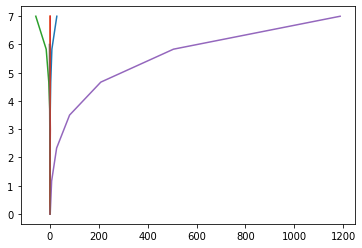

In [ ]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import math
import numpy as np
import matplotlib.pyplot as plt
'''def model(z,t):
  dq1dt=sym.diff(q1)
  dq2dt=sym.diff(q2)
  dzdt=sym.diff(d4)
  dq1ddt=r[0]
  dq2ddt=r[1]
  dzddt=r[2]
  dzdt=[dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
  return dzdt

z0 = [0,0]
t=np.linspace(0,5)
z=odeint(model,z0,t)'''
E1=[]
E2=[]
E3=[]
T=[]


def Model(t, y):
  ini=np.array([1,1,1])
  f=np.array([3,3,3])
  tf=t
  tf=t
  ax0=ini[0]
  ay0=ini[1]
  az0=ini[2]
  ax1=0
  ay1=0
  az1=0

  A=np.array([[tf**2,tf**3,0,0,0,0],[0,0,tf**2,tf**3,0,0],[0,0,0,0,tf**2,tf**3],[2*tf,3*tf**2,0,0,0,0],[0,0,2*tf,3*tf**2,0,0],[0,0,0,0,2*tf,3*tf**2]])
  K=np.array([f[0],f[1],f[2],0,0,0])
  invA=np.linalg.inv(A)
  X=invA@K

  ax2=X[0]
  ax3=X[1]
  ay2=X[2]
  ay3=X[3]
  az2=X[4]
  az3=X[5]
  Aa=np.array([[ax0,ax1,ax2,ax3],[ay0,ay1,ay2,ay3],[az0,az1,az2,az3]])
  arr = np.array([[0,0,0]])

   #PATH calculator
  def pathfunc(tf,Aa,arr):
     m=0
     for m in range (tf+1):
       T=np.array([1,m,m**2,m**3])


  row=Aa@T
  arr = np.vstack([arr,row])

  return arr

arr = np.array([[0,0,0]])
arr1 =pathfunc(tf,Aa,arr) #here we get all the points of trajectory


#inverse kinematics

def invkine(arr1,J):
  for i in range(len(arr1)):
    x=[0]*3;
    x=arr1[i];
    offset=2;
    d1=3;
    d2=1;
    r = abs((x[0]**2+x[1]**2-d1**2-d2**2)/(2*d1*d2))
    theta2 = np.arctan(np.sqrt(abs(1-r**2))/r)
    theta1 = np.arctan(x[1]/x[0]) - np.arctan((d2*np.sin(theta2))/(d1+d2*np.cos(theta2)))
    d3 =offset-x[2]
    s=np.array([theta1,theta2,d3])
    J=np.vstack([J,s])
  return J

    
  J=np.array([[0,0,0]])
  arr2=invkine(arr1,J) #here we get all the JOINT VAR of trajectory
  Q1=arr2[:,0]
  Q2=arr2[:,1]
  D4=arr2[:,2]


  KP=0.5
  KI=0.2
  q1=y[0]
  q2=y[1]
  d4=y[2]
  q1dot=y[3]
  q2dot=y[4]
  d4dot=y[5]
  dq1dt=q1dot
  dq2dt=q2dot
  dzdt=d4dot
    
  T.append(t)
   
  n=round(t)
  if(t<=n+1):
    e1=(Q1[n-1]-q1)
    e2=(Q2[n-1]-q2)
    e3=(D4[n-1]-d4)
  else:
    n=n+1
    e1=(Q1[n]-q1)
    e2=(Q2[n]-q2)
    e3=(D4[n]-d4)
   
  E1.append(e1)
  E2.append(e2)
  E3.append(e3)
  s1=0
  s2=0
  s3=0

  if(t>2):
      for i in range(7):
          s1=s1+ (E1[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
          s2=s2+ (E2[-(1+i)])*(T[-(1+i)]-T[-(2+i)])
          s3=s3+ (E3[-(1+i)])*(T[-(1+i)]-T[-(2+i)])

  T1=KP*(e1)+KI*(s1)
  #print(T1)
  T2=KP*(e2)+KI*(s2)
  F=KP*(e3)+KI*(s3)
    
    #dq1ddt=(360*q1dot*q2dot*np.sin(q2)+360*q2dot*(q1dot+q2dot)*np.sin(q2)-(-6*q1dot**2*np.sin(q2)+3)*(72*np.cos(q2)+60)+240)/(432*np.cos(q2)**2-540)
  dq1ddt=(60.0*T1 + 360.0*q1dot*q2dot*math.sin(q2) + 360.0*q2dot*(q1dot + q2dot)*math.sin(q2) - (T2 - 6.0*q1dot**2*math.sin(q2))*(72.0*math.cos(q2) + 60.0))/(432.0*math.cos(q2)**2 - 540.0)
    #dq2ddt=((-6*q1dot**2*np.sin(q2)+3)*(12*np.cos(q2)+14)-(6*np.cos(q2)+5)*(6*q1dot*q2dot*np.sin(q2)+6*q2dot*(q1dot+q2dot)*np.sin(q2)+4))/(36*np.cos(q2)**2-45)
  dq2ddt=((T2 - 6.0*q1dot**2*math.sin(q2))*(12.0*math.cos(q2) + 14.0) - (6.0*math.cos(q2) + 5.0)*(T1 + 6.0*q1dot*q2dot*math.sin(q2) + 6.0*q2dot*(q1dot + q2dot)*math.sin(q2)))/(36.0*math.cos(q2)**2 - 45.0)
  dzddt= -F +7
    
  dydt = [dq1dt,dq2dt,dzdt,dq1ddt,dq2ddt,dzddt]
  return dydt



  initstate = [Q1[0],0.5843739,1.,0,0,0] # initial states
  timestep = 1

  time = np.linspace(0,7,7) # define the time for which we want to solve


# solve the ODE. solve_ivp is the most recent version of the solver. Check docs for more information on how to use.
  solution = solve_ivp(Model, [0, time[-1]], initstate, t_eval= time) 
Q1n=solution.y[0]
Q2n=solution.y[1]
D4n=solution.y[2]
Q1DOT=solution.y[3]
Q2DOT=solution.y[4]
D4DOT=solution.y[5]

plt.plot(Q1n,time)
l=[0,1,2,3,4,5,6,7]
plt.plot(Q1,l)
plt.plot(Q2n,time)
l=[0,1,2,3,4,5,6,7]
plt.plot(Q2,l)
plt.plot(D4n,time)
l=[0,1,2,3,4,5,6]
plt.plot(D4,l)





In [ ]:
T MATRIX CALCULATOR

In [ ]:
import sympy as sym
from sympy import diff, sin, cos
from scipy.integrate import odeint
import scipy
import scipy.integrate
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
a=10.333333333333332 
b=7.666666666666666 
g=6 
d=1.3333333333333333
GR=9.8
m4=1



sym.init_printing()
q1, q2, q3,q1dot,q2dot,q3dot,q1ddot,q2ddot,q3ddot,T1,T2,F,mG,l1,l2,l3 = sym.symbols('q1 q2 q3 q1dot q2dot d4dot q1ddot q2ddot d4ddot T1 T2 F mG l1 l2 l3')
k1=sym.Matrix([q1,q2,q3])
k2=sym.Matrix([q1dot,q2dot,q3dot])
k3=sym.Matrix([q1ddot,q2ddot,q3ddot])
GQ=sym.Matrix([0,0,mG])
tau=sym.Matrix([T1,T2,F])
M=sym.Matrix([[-(l1/2)*sym.sin(q1),0,0],[(l1/2)*sym.cos(q1),0,0],[0,0,0]]);
X=M.T
N=sym.Matrix([[-l1*sym.sin(q1)-(l2/2)*sym.sin(q1+q2),-(l2/2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2/2)*sym.cos(q1+q2),(l2/2)*sym.cos(q1+q2),0],[0,0,0]]);
Y=N.T
O=sym.Matrix([[-l1*sym.sin(q1)-(l2)*sym.sin(q1+q2),-(l2)*sym.sin(q1+q2),0],[(l1)*sym.cos(q1)+(l2)*sym.cos(q1+q2),(l2)*sym.cos(q1+q2),0],[0,0,-1]]);
A1=sym.Matrix([[sym.cos(q1),-sym.sin(q1),0,0],[sym.sin(q1),sym.cos(q1),0,0],[0,0,1,l1],[0,0,0,1]]);

A2=sym.Matrix([[sym.cos(q2),0,-sym.sin(q2),0],[sym.sin(q2),0,sym.cos(q2),0],[0,-1,0,l2],[0,0,0,1]]);
A3=sym.Matrix([[sym.cos(q3),-sym.sin(q3),0,l3*sym.cos(q1)],[sym.sin(q3),sym.cos(q3),0,l3*sym.sin(q3)],[0,0,1,0],[0,0,0,1]]);



sym.simplify(A1*A2*A3)